# Essais de simulation d'une épidémie

Fares Jelassi, Anita Dürr

Avril 2020

Fortement inspiré de  : https://www.youtube.com/watch?v=gxAaO2rsdIs, https://fr.wikipedia.org/wiki/Mod%C3%A8les_compartimentaux_en_%C3%A9pid%C3%A9miologie, https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Modèle SIR

Nous utilisons un modèle compartimental pour simuler l'épidémie, en commençant par un modèle simple : SIR.

Soit $N$ la taille de la population. 
On partitionne la population en 3 catégories : 
* S : les personnes saines
* I : les personnes infectueuses
* R : les personnes retirées c'est à dire les morts et les guéries, qui ne peuvent plus attraper le virus ni le transmettre

On définit $\beta$ comme le produit entre le nombre de contacts avec d'autre personnes par unité de temps et la probabilité de transmission lors d'un contact entre une personne saine et une personne infectueuse. Le rapport $I/N$ représente la probabilité que la personne avec qui une personne saine est en contact soit infectueuse. Ainsi l'évolution de la population S peut se décrire par l'équation différentielle :

$$\frac{dS}{dt} = - \beta \frac{I}{N} S$$

Le paramètre $\gamma$ représente le taux de personnes infectueuses qui sortent de cet état pour entrer dans R. On peut aisni le définir comme l'inverse de la durée d'une infection. L'évolution de la population R est ainsi donnée par l'équation différentielle :

$$\frac{dR}{dt} = \gamma I$$

Finalement, puisqu'on fait l'hypothèse que $S + I + R = N$ et que $\frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0$, on obtient pour I :

$$\frac{dI}{dt} = \beta \frac{I}{N} S -\gamma I$$.

On peut résoudre ces équations différentielles avec la méthdoe des accroissements finis en approximant $\frac{dS}{dt}$ par $S(t + 1) - S(t)$.

In [11]:
def edoSIR_discret(S, I, R, beta, gamma, N):
    '''
    :param: S = S(t)
            I = I(t)
            R = R(t)
            beta, gamma, N the model's parameters
    :return: S(t+1), I(t+1), R(t+1) with the finite difference approximation
    '''
    St = - beta * S * I / N + S
    It = beta * S * I / N - I * (gamma - 1)
    Rt = gamma * I + R
#    Rt = N - St - It
    return St, It, Rt

In [12]:
def edoSIR_continue(S, I, R, beta, gamma, N):
    '''
    :param: S = S(t)
            I = I(t)
            R = R(t)
            beta, gamma, N the model's parameters
    :return: S(t+1), I(t+1), R(t+1) with the continuous resolution of the edo
    '''
    St, It, Rt = 0, 0, 0
    return St, It, Rt

In [13]:
def SIR(S0, I0, R0, beta, gamma, N, end):
    Ls, Li, Lr = np.empty(end), np.empty(end), np.empty(end)
    St, It, Rt = S0, I0, R0
    for t in range(end):
        Ls[t], Li[t], Lr[t] = St, It, Rt
        St, It, Rt = edoSIR_discret(St, It, Rt, beta, gamma, N)
    return Ls, Li, Lr

### Paramètres et initialisation

Nos choix des paramètres p et c sont arbitraires.
Le R_0 (= Rnutch, le taux de reproduction de base) est entre 2 et 3, comme pour le Covid-19.

In [39]:
N = 1000 # total population

I0 = 10
R0 = 0
S0 = N - I0 - R0

d = 20 # durée d'une infection

p = 1/50 # probabilité de transmission lors d'un contact entre un I et un S
c = 30 # nombre de contact par unité de temps

beta = p * c
gamma = 1/d

Rnutch = beta/gamma    #/!\ attention  pas le même R0 que l'initialisation de removed population

print('Rnutch :', Rnutch)

Rnutch : 11.999999999999998


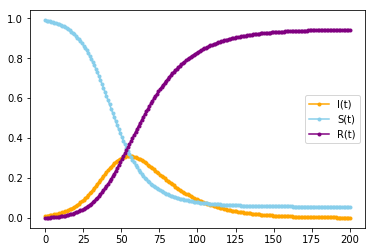

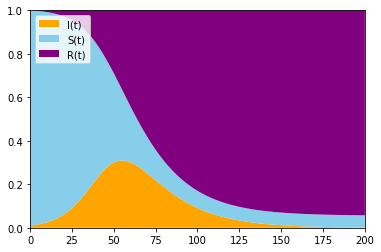

In [38]:
end = 200
t = np.linspace(0, end, end)
Ls, Li, Lr = SIR(S0, I0, R0, beta, gamma, N, end)

#normaliser
Ls = Ls / N
Li = Li / N
Lr = Lr / N

plt.plot(t, Li, marker='.', color='orange', label='I(t)')
plt.plot(t, Ls, marker='.', color='skyblue', label='S(t)')
plt.plot(t, Lr, marker='.', color='purple', label='R(t)')
plt.legend()
plt.show()

plt.stackplot(t, Li, Ls, Lr, labels=['I(t)', 'S(t)', 'R(t)'], colors=['orange', 'skyblue', 'purple'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.show()

## Modèle SIDC

On partitionne la population en 4 catégories : 
* S : les personnes saines
* I : les personnes infectueuses
* D : les personnes mortes (dead)
* C : les personnes guéries (cured)



In [ ]:
def edoSIDC_discret(S, I, D, C, beta, gamma, delta, N):
    '''
    :param: S = S(t)
            I = I(t)
            R = R(t)
            beta, gamma, N the model's parameters
    :return: S(t+1), I(t+1), R(t+1) with the finite difference approximation
    '''
    St = - beta * S * I / N + S
    It = beta * S * I / N - I * (gamma - 1)
    R = D + C
    Rt = gamma * I + R
    Dt = delta * Rt
    Ct = Rt - Dt
#    Rt = N - St - It
    return St, It, Dt, Ct

In [ ]:
def SIDC(S0, I0, D0, C0, beta, gamma, delta, N, end):
    Ls, Li, Ld, Lc = np.empty(end), np.empty(end), np.empty(end), np.empty(end)
    St, It, Dt, Ct = S0, I0, D0, C0
    for t in range(end):
        Ls[t], Li[t], Ld[t], Lc[t] = St, It, Dt, Ct
        St, It, Dt, Ct = edo_discret(St, It, Dt, Ct, beta, gamma, delta, N)
    return Ls, Li, Ld, Lc

In [1]:
N = 1000

I0 = 10
D0 = 0
C0 = 0
S0 = N - I0 - D0 - C0

d = 20 

p1 = 1/50 # probabilité de transmission lors d'un contact entre un I et un S
c1 = 30 # nombre de contact par unité de temps

p2 = 1/100
c2 = 3

beta = p1 * c1
betaconf = p2 * c2
gamma = 1/d
delta = 1/3

Rnutch = beta/gamma    #/!\ attention  pas le même R0 que l'initialisation de removed population
Rnutch_conf = beta/gamma

end = 60
t = np.linspace(0, end, end)
Ls, Li, Ld, Lc = SIR(S0, I0, D0, C0, beta, gamma, delta, N, end, betaconf)

#normaliser
Ls = Ls / N
Li = Li / N
Ld = Ld / N
Lc = Lc / N

plt.plot(t, Li, marker='.', color='orange', label='I(t)')
plt.plot(t, Ls, marker='.', color='skyblue', label='S(t)')
plt.plot(t, Ld, marker='.', color='purple', label='D(t)')
plt.plot(t, Lc, marker='.', color='green', label='C(t)')
plt.legend()
plt.show()

plt.stackplot(t, Li, Ls, Ld, Lc, labels=['I(t)', 'S(t)', 'D(t)', 'C(t)'], colors=['orange', 'skyblue', 'purple', 'green'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.show()

NameError: name 'np' is not defined